THE SPARKS FOUNDATION - GRIP - Data Science and Business Analytics, August'2021

Task 1 : Prediction using Supervised ML

Author : GADWALA VENKATA DHANUSH GOUD

In [12]:
import pandas as pd
import numpy as np  
import seaborn as sb
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")
df.head()

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Score
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Score   25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours    0
Score    0
dtype: int64

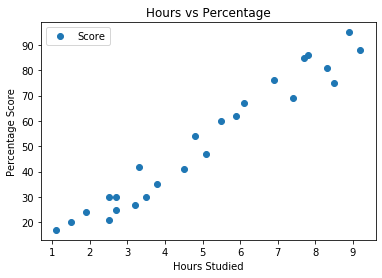

In [9]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Score', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [10]:
#correlation is useful for getting the relationship between attributes.
#by default it will give the correlation by person method
df.corr()

,Hours,Score
Hours,1.000000,0.976191
Score,0.976191,1.000000


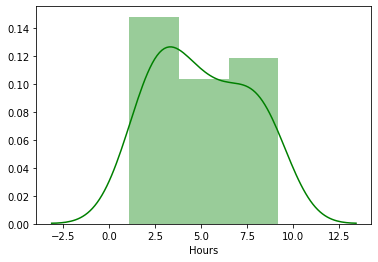

In [13]:
sb.distplot(df['Hours'],color='green')

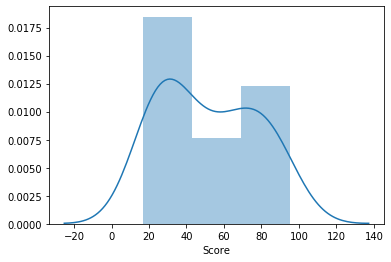

In [14]:
sb.distplot(df['Score'])

In [17]:
#splitting the dataset into independent and dependent variable
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [19]:
#splotting the dataset into train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
algo=LinearRegression()

In [22]:
algo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred=regressor.predict(X_test)

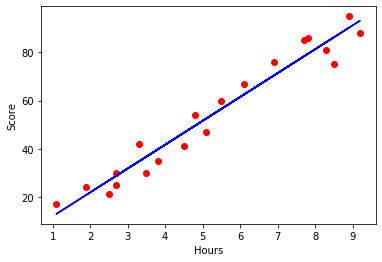

In [24]:
# visualizing the training set result
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

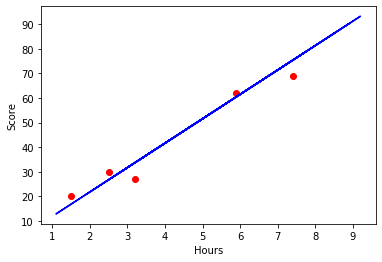

In [25]:
# visualizing the training set result
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [29]:
# Comparing Actual vs Predicted
pred=algo.predict(X_test)
pd.DataFrame({'ACTUAL_VALUE':y_test,'PREDICTED_VALUE':pred})

,ACTUAL_VALUE,PREDICTED_VALUE
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [32]:
#predict the result
prediction=regressor.predict([[9.5]])
prediction

array([96.16939661])

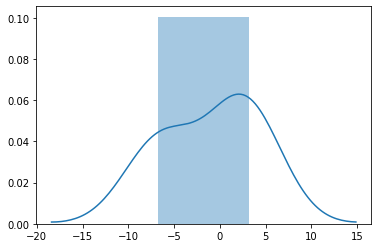

In [34]:
sb.distplot(y_test-pred)

In [27]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
#  test with own data
h= 9.25
a=algo.predict([[h]])
print('If student studies for {} hours per day he/she is likely to score {}%'.format(h,*a))

If student studies for 9.25 hours per day he/she is likely to score 93.69173248737538%


In [36]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356